## Train / Test

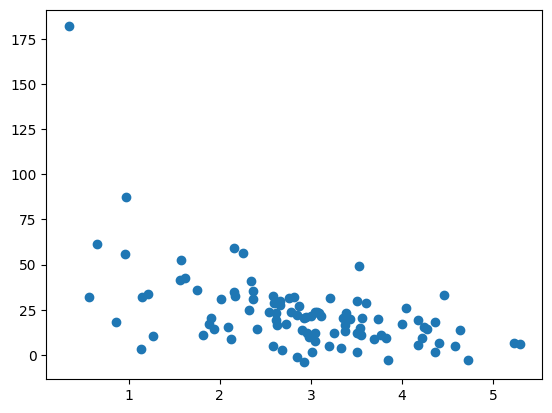

In [1]:
%matplotlib inline
import numpy as np
from pylab import *

np.random.seed(2)

pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)

In [2]:
trainX = pageSpeeds[:80]
testX = pageSpeeds[80:]

trainY = purchaseAmount[:80]
testY = purchaseAmount[80:]

x = np.array(trainX)
y = np.array(trainY)

p4 = np.poly1d(np.polyfit(x, y, 8))

In [10]:
from sklearn.metrics import r2_score

for i in range(8):
    model = np.poly1d(np.polyfit(trainX, trainY, i))
    r2_score_test = r2_score(testY, model(testX))
    r2_score_train = r2_score(trainY, model(trainX))
    print(f" Grau do polinômio: {i}\n r2_score_train : {r2_score_train:.2f}\n r2_score_test : {r2_score_test:.2f}\n")

 Grau do polinômio: 0
 r2_score_train : 0.00
 r2_score_test : -0.03

 Grau do polinômio: 1
 r2_score_train : 0.26
 r2_score_test : 0.42

 Grau do polinômio: 2
 r2_score_train : 0.36
 r2_score_test : 0.29

 Grau do polinômio: 3
 r2_score_train : 0.43
 r2_score_test : 0.27

 Grau do polinômio: 4
 r2_score_train : 0.48
 r2_score_test : 0.39

 Grau do polinômio: 5
 r2_score_train : 0.55
 r2_score_test : 0.50

 Grau do polinômio: 6
 r2_score_train : 0.60
 r2_score_test : 0.61

 Grau do polinômio: 7
 r2_score_train : 0.62
 r2_score_test : 0.55

 Grau do polinômio: 8
 r2_score_train : 0.64
 r2_score_test : 0.30

 Grau do polinômio: 9
 r2_score_train : 0.66
 r2_score_test : 0.22

 Grau do polinômio: 10
 r2_score_train : 0.68
 r2_score_test : 0.22



Grau do polinômio: 0


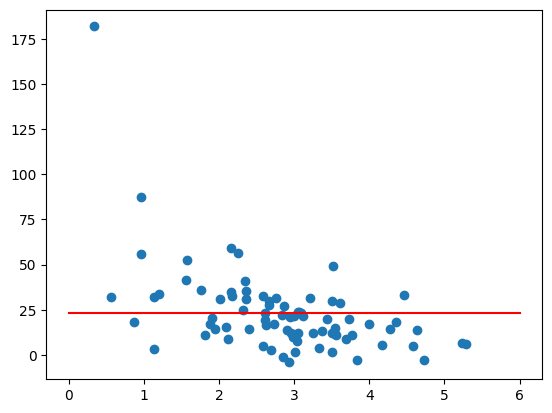

R2: 0.0
Grau do polinômio: 1


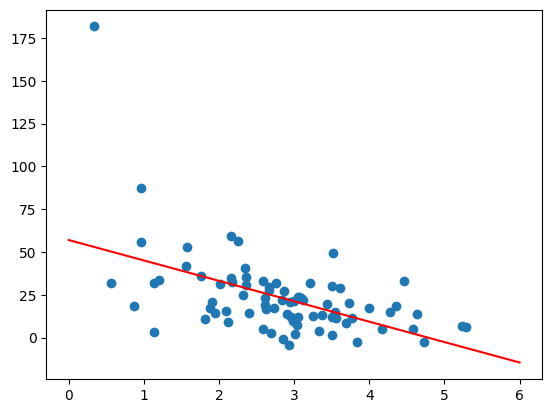

R2: 0.2646676132565092
Grau do polinômio: 2


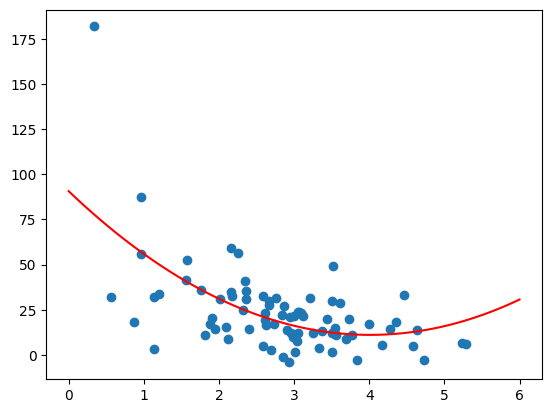

R2: 0.36158094628302184
Grau do polinômio: 3


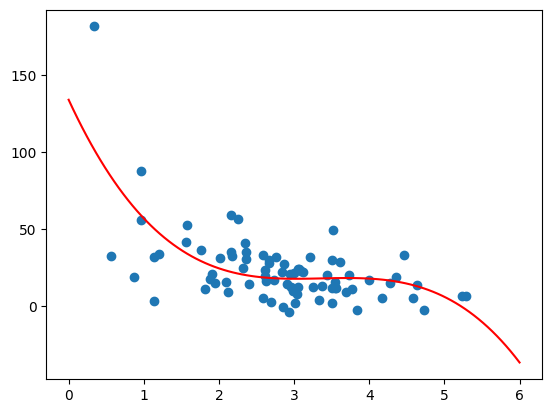

R2: 0.4295783201206692
Grau do polinômio: 4


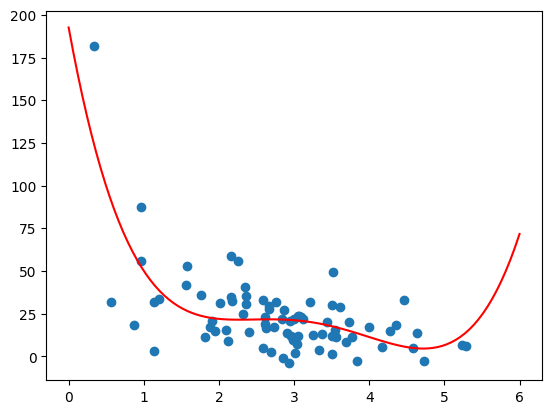

R2: 0.4831221655972038
Grau do polinômio: 5


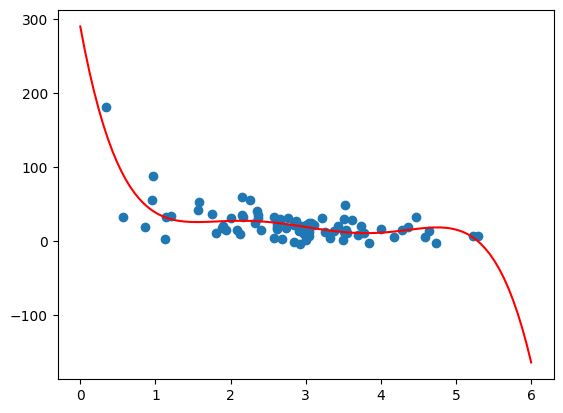

R2: 0.5544872536567714
Grau do polinômio: 6


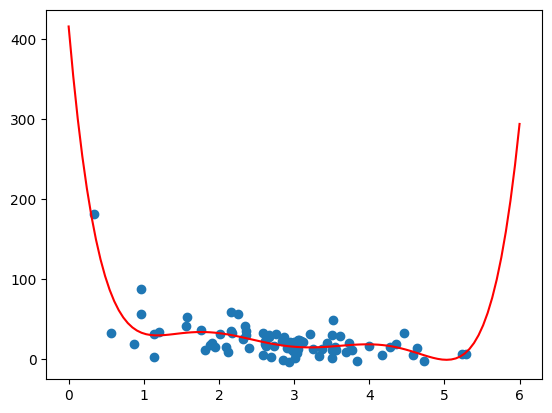

R2: 0.6025441707110514
Grau do polinômio: 7


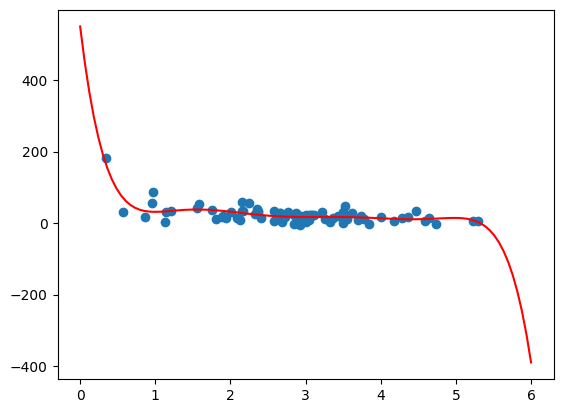

R2: 0.6170116571732045


0.6170116571732045

In [9]:
r2=[]

for i in range(8):
    print(f'Grau do polinômio: {i}')
    p4 = np.poly1d(np.polyfit(x, y, i))

    xp = np.linspace(0, 6, 100)
    plt.scatter(x, y)
    plt.plot(xp, p4(xp), c='r')
    plt.show()
    r2.append(r2_score(np.array(trainY), p4(np.array(trainX))))
    print(f'R2: {r2_score(np.array(trainY), p4(np.array(trainX)))}')


r2_score(np.array(trainY), p4(np.array(trainX)))


## Regressão Polinomial

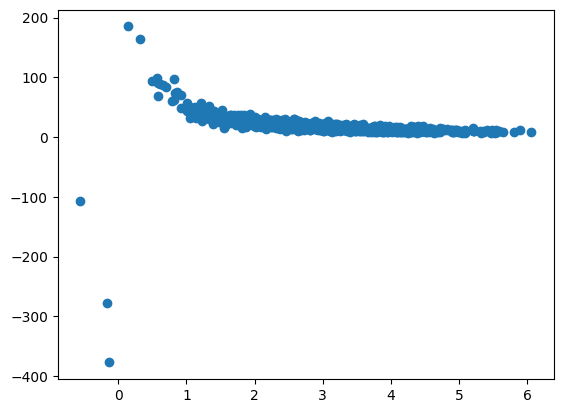

In [12]:
%matplotlib inline
from pylab import *
import numpy as np

np.random.seed(8)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)

In [14]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

p4 = np.poly1d(np.polyfit(x, y, 4))

0º grau
 r2_score = -0.00


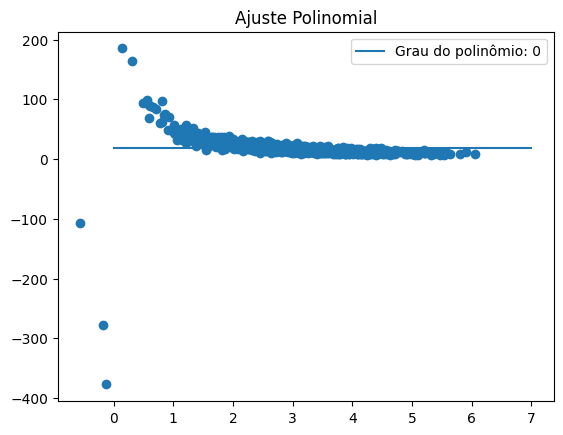




1º grau
 r2_score = 0.09


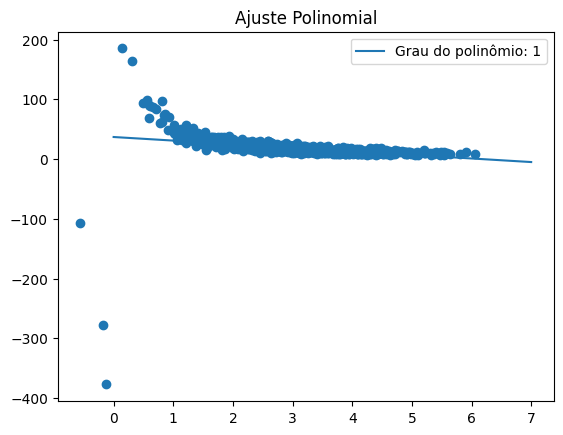




2º grau
 r2_score = 0.09


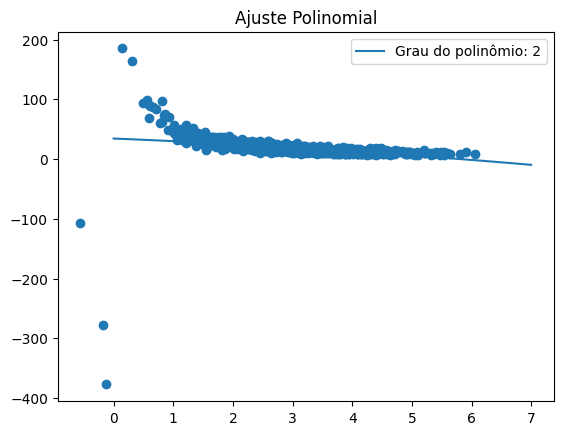




3º grau
 r2_score = 0.17


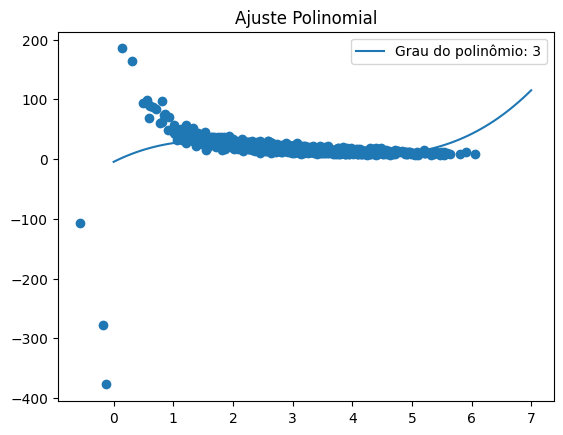




4º grau
 r2_score = 0.32


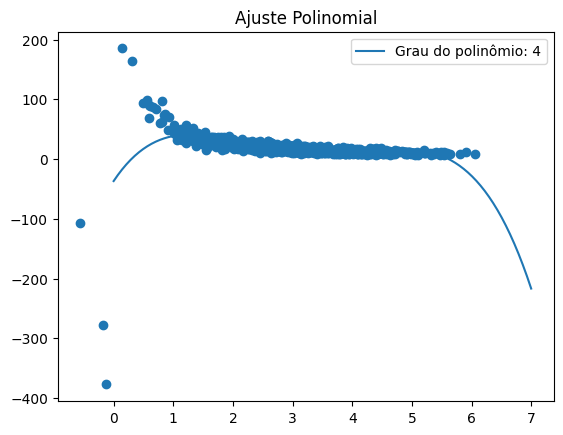




5º grau
 r2_score = 0.41


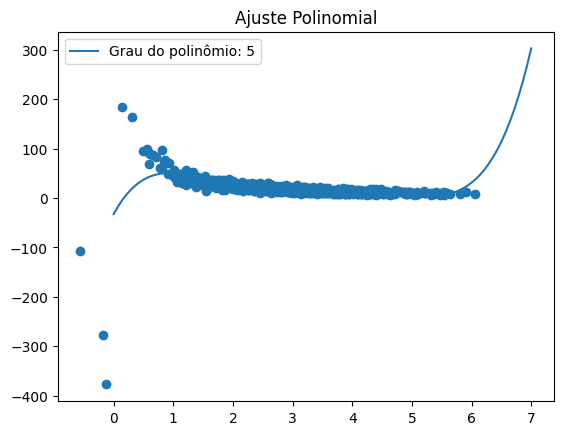




6º grau
 r2_score = 0.42


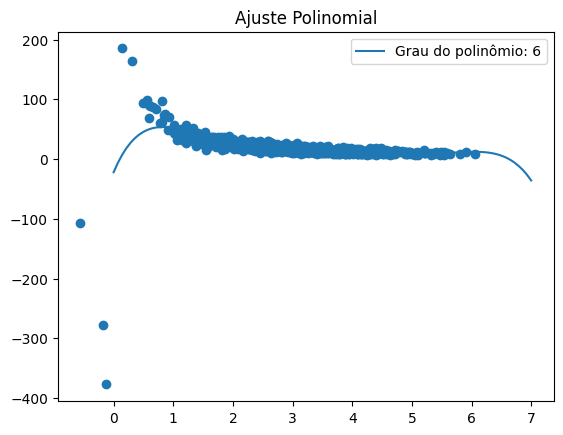




7º grau
 r2_score = 0.43


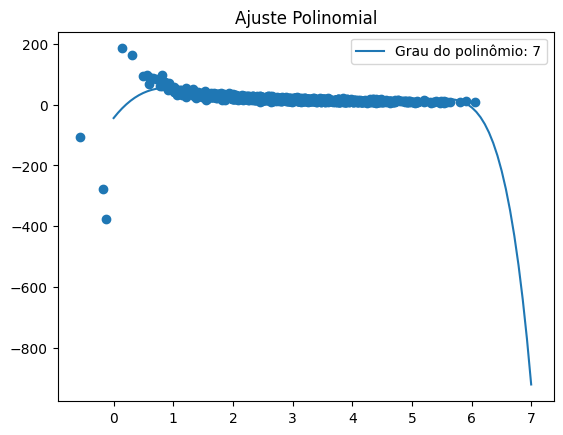

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

for i in range(8):
    p = np.poly1d(np.polyfit(x, y, i))

    xp = np.linspace(0, 7, 100)
    fitLine = p(xp)

    plt.scatter(x, y)
    plt.plot(xp, fitLine, label=f"Grau do polinômio: {i}")
    plt.title(f"Ajuste Polinomial")
    plt.legend()
    plt.show()
    print('\n\n')

    r2 = r2_score(y, p(x))
    print(f"{i}º grau\n r2_score = {r2:.2f}")

## RandomForest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text

X = [[1, 1, 0, 1, 1], [1, 1, 1, 1, 0],[1, 1, 1, 0, 0], [1, 0, 1, 0, 0] ]
y = [0, 1, 1, 0]

inv_y = [1 - yi for yi in y]  # Inverte os valores: 0 vira 1 e 1 vira 0

inv_clf = RandomForestClassifier(n_estimators=10, random_state=42)
inv_clf.fit(X, inv_y)

print("Random Forest Invertida:")
print(export_text(inv_clf.estimators_[0], feature_names=["Feature1", "Feature2", "Feature3", "Feature4", "Feature5"]))

print('\n\n')
print("Previsões X Dados de teste:")
reversed_predictions = inv_clf.predict([[1, 1, 0, 1, 1], [1, 1, 1, 1, 0],[1, 1, 1, 0, 0], [1, 0, 1, 0, 0]])

print("Previsões invertidas:", reversed_predictions)
print("Dados originais:", y)



Random Forest Invertida:
|--- Feature2 <= 0.50
|   |--- class: 1.0
|--- Feature2 >  0.50
|   |--- class: 0.0




Previsões X Dados de teste:
Previsões invertidas: [0 0 0 1]
Dados originais: [0, 1, 1, 0]
